In [1]:
#!pip install natsort
#!pip install seaborn
#!pip install glob2
#!pip install xarray

In [2]:
import pandas as pd
%pylab inline
import seaborn as sns
import glob2
#Trying to work out a safety for natsort
from types import ModuleType
from natsort import natsort as ns
if isinstance(ns, ModuleType):
    natsort = ns.natsorted
else:
    nasort = ns

Populating the interactive namespace from numpy and matplotlib


In [3]:
ls

Untitled.ipynb  pandas_analysis-Copy1.ipynb
analysis.ipynb  pandas_analysis.ipynb


## R

In [20]:
#rdir = '/workspace'
rdir = '../'
dat_files = natsort(glob2.glob(rdir + '/ext_results/results/R4/**/*.dat'))

len(dat_files)
#dat_files

10

In [21]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [22]:
data = []
realtime = []
gooddata = []
col = 'rmsSurfScaled'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (np.sqrt(df['rmsSurf'])/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:9: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


dict_files = natsort(glob2.glob(rdir + '/temp_results/results/R/**/md.pkl'))
import pickle
dicts= []
for df in dict_files:
    with open(df,'rb') as f:
        dicts.append(pickle.load(f))
        
dict_sets = [set(d.iteritems()) for d in dicts]
diff_keys = [i[0] for i in set.difference(dict_sets[0], set.intersection(*map(set,dict_sets)))]

clean_dicts = []
for adict in dicts:
    red_dict= dict((k,adict[k]) for k in diff_keys if k in adict)
    clean_dicts.append(red_dict)
    
    
params = pd.DataFrame(clean_dicts)
#newdf = newdf.join(params)

In [23]:
[i + 1 for i in gooddata]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [24]:
data.shape

(10,)

In [25]:
import numpy as np
params = []
counter = 1
for a in [128, 160, 192, 256, 320]:
    for b in ["Q1/dQ0", "Q2/DPC1"]:
        params.append([a,b, counter])
        counter +=1
params = np.array(params)[gooddata]
#params = np.array(params)

print(len(params))
#params[25]

10


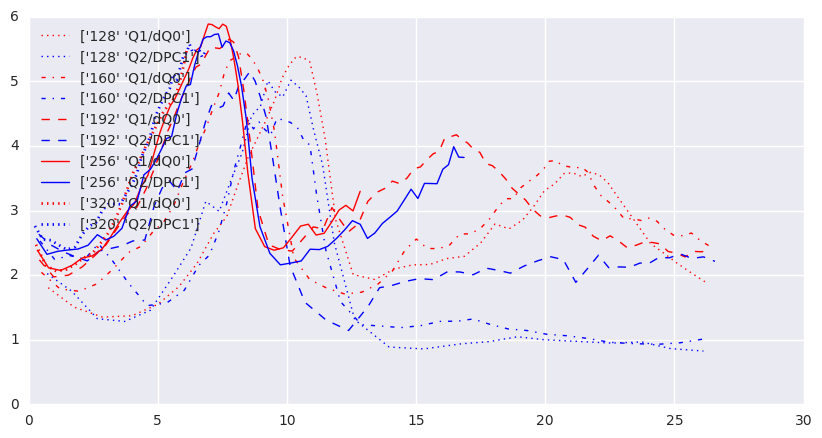

In [26]:
fig, ax = plt.subplots(figsize=(10,5))



for i in range(0, realtime.shape[0]):
        lw = 1
        #print(i, gooddata[i])
        if params[i][0] == '128':
            ls = ':'
        if params[i][0] == '160':
            ls = '-.'
        elif params[i][0] == '192':
            ls = '--'
        elif params[i][0] == '256':
            ls = '-'
        elif params[i][0] == '320':
            ls = ':'
            lw = 2    
        if params[i][1] == 'Q1/dQ0':
            c = 'r'
            
        else:
            c   = 'b'
            
        ax.plot(realtime[i], data[i], c=c, linestyle=ls, linewidth = lw, label=str((params[i][[0,1]])) )

#ax.set_xlim(0., 0.00012)
#ax.set_ylim(-0.7, 0.7)
ax.legend(loc=2)


Note the resoltion for the q2 models is half the recoded. 256 => 128.  


    

In [27]:
for d in data:
    print(d.min())

1.34994379312
0.823990238969
1.70729890801
0.928866241839
1.97309028728
1.14239631774
2.07211877057
2.15919863109
2.05956216665
2.39377106188


In [28]:
#df['rmsSurfScaled']

## Test surface velocity files

In [29]:
import h5py
fname = '../ext_results/randoms/velxSurface_50.h5'
with h5py.File(fname,'r') as hf:
    #print('List of arrays in this file: \n', hf.keys())
    data = hf.get('data')
    np_data = np.array(data)


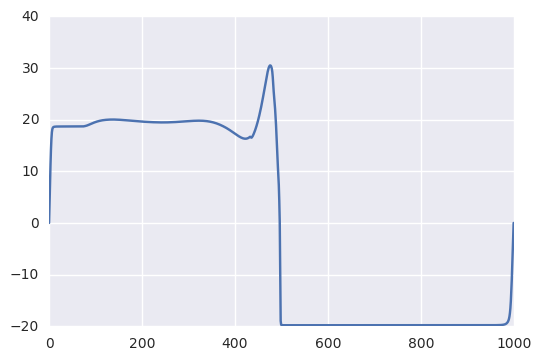

In [30]:
plt.plot((np_data/(2900.*1e3/1e-6))*(1e2*3600*24*365))


## A

In [4]:
#rdir = '/workspace'
rdir = '../'
#dat_files = natsort(glob2.glob(rdir + '/ext_results/results/Y0/**/*.dat'))

#dat_files = natsort(glob2.glob(rdir + '/ext_results/randoms/*A_1*.dat'))
dat_files = natsort(glob2.glob(rdir + '/ext_results/results/A2/**/*.dat'))


len(dat_files)
#dat_files

49

In [5]:
columns2 = ['areaintRock', 'tempintRock', 'rmsintRock', 'dwintRock', 'vdintRock', 
            'areaintLith', 'tempintLith','rmsintLith', 'dwintLith', 'vdintLith',
            'areaintLower', 'tempintLower', 'rmsintLower', 'dwintLower', 'vdintLower', 
            'areaintHinge180', 'vdintHinge180', 'areaintHinge60', 'vdintHinge60', 
            'areaintInterface', 'vdintInterface', 'vdintInterface0',
            'rmsSurf', 'nuTop', 'nuBottom', 'plateness', 'subzone',
            'lRidge', 'rRidge', 'realtime']

In [6]:
len(dat_files)

49

In [7]:
data = []
realtime = []
gooddata = []
area = []
col = 'rmsSurfScaled'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        area.append(df['areaintRock'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [8]:
len(gooddata)

49

In [9]:
params = []
counter = 1
for a in [0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]:
    for b in [0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]:
        params.append([a,b, counter])
        print a, b, counter
        counter +=1
#params = np.array(params)[gooddata]
#params = np.array(params)

print(len(params))
#params[25]

0.1 0.1 1
0.1 0.25 2
0.1 0.5 3
0.1 1.0 4
0.1 2.0 5
0.1 5.0 6
0.1 10.0 7
0.25 0.1 8
0.25 0.25 9
0.25 0.5 10
0.25 1.0 11
0.25 2.0 12
0.25 5.0 13
0.25 10.0 14
0.5 0.1 15
0.5 0.25 16
0.5 0.5 17
0.5 1.0 18
0.5 2.0 19
0.5 5.0 20
0.5 10.0 21
1.0 0.1 22
1.0 0.25 23
1.0 0.5 24
1.0 1.0 25
1.0 2.0 26
1.0 5.0 27
1.0 10.0 28
2.0 0.1 29
2.0 0.25 30
2.0 0.5 31
2.0 1.0 32
2.0 2.0 33
2.0 5.0 34
2.0 10.0 35
5.0 0.1 36
5.0 0.25 37
5.0 0.5 38
5.0 1.0 39
5.0 2.0 40
5.0 5.0 41
5.0 10.0 42
10.0 0.1 43
10.0 0.25 44
10.0 0.5 45
10.0 1.0 46
10.0 2.0 47
10.0 5.0 48
10.0 10.0 49
49


In [10]:
plist = [0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]
clist = ['k', 'g', 'r', 'y', 'b', 'c', 'm']

cdict = dict(zip(clist, plist))
inv_map = dict(zip(cdict.values(), cdict.keys()))


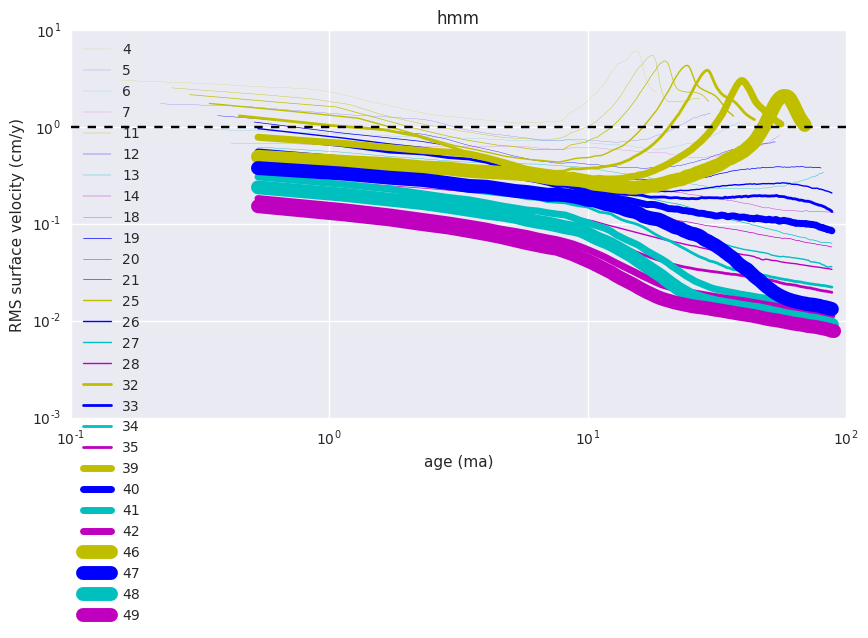

In [14]:

fig, ax = plt.subplots(figsize=(10,5))

for i in range(0, realtime.shape[0]):
    c = inv_map[params[i][1]]
    if params[i][1] >= 1.:
        ax.plot(realtime[i], data[i], c= c, label = str(params[i][2]), linewidth= params[i][0])

ax.set_xlim(0.1, 100.)
#ax.set_ylim(-0.7, 0.7)
ax.legend(loc=2)
ax.set_title('hmm')
ax.set_ylabel('RMS surface velocity (cm/y)')
ax.set_xlabel('age (ma)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axhline(1., c='k', ls='--')

In [10]:
params[0]

[0.1, 0.1, 1]

In [11]:
data = []

for i in range(len(dat_files)):
    df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
    data.append(df.mean())
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

del df
newdf = pd.DataFrame(data)
    
newdf.columns = columns2

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [12]:
newdf['rmsSurfScaled'] = (newdf['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)

In [13]:
eta_max_crust=[]
eta_0=[]

counter = 1
for a in [0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]:
    for b in [0.1, 0.25, 0.5, 1.0, 2.0, 5.0, 10.0]:
        eta_max_crust.append(a), eta_0.append(b)
        

In [14]:
newdf['eta_max_crust'] = eta_max_crust
newdf['eta_0'] = eta_0

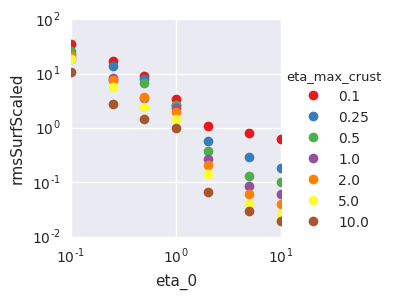

In [15]:
yaxis = 'rmsSurfScaled' #'rmsSurf'#, 'nuTop' #


kws = dict(marker="o", linestyle="") 


g = sns.FacetGrid(newdf,   hue="eta_max_crust", palette="Set1")
g = g.map(plt.plot, 'eta_0', yaxis,  **kws).add_legend()
#.set(ylim=(0, 30000))


g.fig.get_axes()[0].set_xscale('log')
g.fig.get_axes()[0].set_yscale('log')

plt.show()

In [16]:
params


[[0.1, 0.1, 1],
 [0.1, 0.25, 2],
 [0.1, 0.5, 3],
 [0.1, 1.0, 4],
 [0.1, 2.0, 5],
 [0.1, 5.0, 6],
 [0.1, 10.0, 7],
 [0.25, 0.1, 8],
 [0.25, 0.25, 9],
 [0.25, 0.5, 10],
 [0.25, 1.0, 11],
 [0.25, 2.0, 12],
 [0.25, 5.0, 13],
 [0.25, 10.0, 14],
 [0.5, 0.1, 15],
 [0.5, 0.25, 16],
 [0.5, 0.5, 17],
 [0.5, 1.0, 18],
 [0.5, 2.0, 19],
 [0.5, 5.0, 20],
 [0.5, 10.0, 21],
 [1.0, 0.1, 22],
 [1.0, 0.25, 23],
 [1.0, 0.5, 24],
 [1.0, 1.0, 25],
 [1.0, 2.0, 26],
 [1.0, 5.0, 27],
 [1.0, 10.0, 28],
 [2.0, 0.1, 29],
 [2.0, 0.25, 30],
 [2.0, 0.5, 31],
 [2.0, 1.0, 32],
 [2.0, 2.0, 33],
 [2.0, 5.0, 34],
 [2.0, 10.0, 35],
 [5.0, 0.1, 36],
 [5.0, 0.25, 37],
 [5.0, 0.5, 38],
 [5.0, 1.0, 39],
 [5.0, 2.0, 40],
 [5.0, 5.0, 41],
 [5.0, 10.0, 42],
 [10.0, 0.1, 43],
 [10.0, 0.25, 44],
 [10.0, 0.5, 45],
 [10.0, 1.0, 46],
 [10.0, 2.0, 47],
 [10.0, 5.0, 48],
 [10.0, 10.0, 49]]

## Pandas Panels

In [17]:
data = []
gooddata = []


for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        gooddata.append(str(i))
        data.append(df)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:8: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [18]:
dictionary = dict(zip(gooddata, data))

In [19]:
panel = pd.Panel(dictionary)

In [20]:
panel.items

Index([u'0', u'1', u'10', u'11', u'12', u'13', u'14', u'15', u'16', u'17',
       u'18', u'19', u'2', u'20', u'21', u'22', u'23', u'24', u'25', u'26',
       u'27', u'28', u'29', u'3', u'30', u'31', u'32', u'33', u'34', u'35',
       u'36', u'37', u'38', u'39', u'4', u'40', u'41', u'42', u'43', u'44',
       u'45', u'46', u'47', u'48', u'5', u'6', u'7', u'8', u'9'],
      dtype='object')

## xarray

xarray.Dataset is xarray’s multi-dimensional equivalent of a DataFrame. It is a dict-like container of labeled arrays (DataArray objects) with aligned dimensions. It is designed as an in-memory representation of the data model from the netCDF file format.

In [23]:
import xarray as xr

In [24]:
xa = xr.DataArray(panel)

In [25]:
print(xa.shape), 
print(xa.coords)

(49, 153, 32) Coordinates:
  * dim_0    (dim_0) object '0' '1' '10' '11' '12' '13' '14' '15' '16' '17' ...
  * dim_1    (dim_1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * dim_2    (dim_2) object 'areaintRock' 'tempintRock' 'rmsintRock' ...


In [26]:
xa[:,0,-1]

<xarray.DataArray (dim_0: 49)>
array([ 0.03207985,  0.06610156,  0.24614572,  0.36946649,  0.52821868,
        0.52953295,  0.06483938,  0.10367557,  0.1647422 ,  0.28808338,
        0.51235315,  0.52953295,  0.10811174,  0.52953295,  0.10086542,
        0.14576561,  0.21235103,  0.34342043,  0.52953295,  0.52953295,
        0.52953295,  0.16708707,  0.22483904,  0.15709205,  0.30236257,
        0.44857006,  0.52953295,  0.52953295,  0.52953295,  0.34875323,
        0.45010319,  0.52355734,  0.52953295,  0.52953295,  0.22204546,
        0.52953295,  0.52953295,  0.51941916,  0.52953295,  0.52953295,
        0.52953295,  0.52953295,  0.52953295,  0.52953295,  0.32716112,
        0.41536447,  0.04503002,  0.08077493,  0.13926903])
Coordinates:
  * dim_0    (dim_0) object '0' '1' '10' '11' '12' '13' '14' '15' '16' '17' ...
    dim_1    int64 0
    dim_2    |S14 'realtimeScaled'

In [27]:
xa.mean(dim='dim_2')

<xarray.DataArray (dim_0: 49, dim_1: 153)>
array([[  5.81172023e+08,   6.34528428e+08,   7.17566461e+08, ...,
                     nan,              nan,              nan],
       [  1.08877006e+08,   1.17958386e+08,   1.29129231e+08, ...,
                     nan,              nan,              nan],
       [  6.84442548e+06,   6.61048057e+06,   6.67938276e+06, ...,
                     nan,              nan,              nan],
       ..., 
       [  4.28350119e+08,   4.63315182e+08,   5.23529666e+08, ...,
                     nan,              nan,              nan],
       [  9.28348741e+07,   9.64663242e+07,   1.10810532e+08, ...,
                     nan,              nan,              nan],
       [  2.62060756e+07,   2.66197296e+07,   2.89450642e+07, ...,
                     nan,              nan,              nan]])
Coordinates:
  * dim_0    (dim_0) object '0' '1' '10' '11' '12' '13' '14' '15' '16' '17' ...
  * dim_1    (dim_1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17

In [38]:
xa.loc[:, :, 'realtimeScaled' ]

<xarray.DataArray (dim_0: 49, dim_1: 153)>
array([[ 0.03207985,  0.06692849,  0.10141012, ...,         nan,
                nan,         nan],
       [ 0.06610156,  0.13985684,  0.2149945 , ...,         nan,
                nan,         nan],
       [ 0.24614572,  0.54726254,  0.86459828, ...,         nan,
                nan,         nan],
       ..., 
       [ 0.04503002,  0.09433269,  0.1432279 , ...,         nan,
                nan,         nan],
       [ 0.08077493,  0.17205137,  0.26379536, ...,         nan,
                nan,         nan],
       [ 0.13926903,  0.30133799,  0.47286725, ...,         nan,
                nan,         nan]])
Coordinates:
  * dim_0    (dim_0) object '0' '1' '10' '11' '12' '13' '14' '15' '16' '17' ...
  * dim_1    (dim_1) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    dim_2    |S14 'realtimeScaled'

In [29]:
xa

<xarray.DataArray (dim_0: 49, dim_1: 153, dim_2: 32)>
array([[[  3.10882759e-01,   2.97151457e-01,   2.13832468e+03, ...,
           1.20293704e-07,   2.04119646e+01,   3.20798468e-02],
        [  3.10882759e-01,   2.97135378e-01,   2.10362030e+03, ...,
           2.50969889e-07,   1.99384659e+01,   6.69284871e-02],
        [  3.10882759e-01,   2.97118953e-01,   2.17173605e+03, ...,
           3.80269855e-07,   2.04131012e+01,   1.01410118e-01],
        ..., 
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan],
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan],
        [             nan,              nan,              nan, ...,
                      nan,              nan,              nan]],

       [[  3.10882759e-01,   2.97138165e-01,   1.02875930e+03, ...,
           2.47869068e-07,   1.00664926e+01,   6.61015620e-02],
      

In [37]:
panel['7']

,areaintRock,tempintRock,rmsintRock,dwintRock,vdintRock,areaintLith,tempintLith,rmsintLith,dwintLith,vdintLith,...,rmsSurf,nuTop,nuBottom,plateness,subzone,lRidge,rRidge,realtime,rmsSurfScaled,realtimeScaled
0,0.310883,0.297145,1527.314014,10.270340,6.728936e+09,0.028270,0.015024,265.348488,-8.346760,4.538534e+09,...,13255.620072,-122.357096,1.455715e-15,0.830035,0.004743,-0.681814,0.681814,1.688545e-07,14.414801,0.045030
1,0.310883,0.297122,1483.615549,10.221455,7.129518e+09,0.028317,0.015053,258.199315,-8.900081,5.105269e+09,...,12769.978535,-124.195782,1.455715e-15,0.832406,0.010672,-0.681814,0.681814,3.537308e-07,13.886691,0.094333
2,0.310883,0.297098,1517.210606,11.197432,7.757114e+09,0.028370,0.015087,264.437798,-10.003948,5.696516e+09,...,12941.127411,-125.729888,1.455715e-15,0.858493,-0.002372,-0.681814,0.681814,5.370791e-07,14.072807,0.143228
3,0.310883,0.297074,1404.454513,10.933821,7.409855e+09,0.028424,0.015121,243.730861,-10.082114,5.488916e+09,...,11851.736650,-126.908894,1.455715e-15,0.846635,0.015415,-0.681814,0.681814,7.287506e-07,12.888151,0.194343
4,0.310883,0.297047,1361.057802,10.683879,7.401357e+09,0.028483,0.015157,236.198570,-10.554814,5.451854e+09,...,11410.491142,-127.662244,1.455715e-15,0.828849,-0.002372,-0.681814,0.681814,9.328671e-07,12.408319,0.248776
5,0.310883,0.297019,1340.427713,11.563243,7.618997e+09,0.028543,0.015194,232.962708,-11.331640,5.566077e+09,...,11171.433902,-128.248472,1.455715e-15,0.821734,0.005929,-0.681814,0.681814,1.143955e-06,12.148357,0.305069
6,0.310883,0.296993,1418.727435,11.850455,8.453224e+09,0.028603,0.015230,246.730316,-12.672932,6.044439e+09,...,11722.439177,-128.869306,1.455715e-15,0.812248,-0.002372,-0.681814,0.681814,1.350877e-06,12.747546,0.360251
7,0.310883,0.296968,1498.205158,14.052790,9.397160e+09,0.028661,0.015267,260.471292,-14.464544,6.641141e+09,...,12257.275283,-129.592253,1.455715e-15,0.835964,-0.011858,-0.681814,0.681814,1.547775e-06,13.329153,0.412760
8,0.310883,0.296944,1617.448326,15.702181,1.041892e+10,0.028713,0.015298,281.499367,-16.427981,7.205830e+09,...,13144.638064,-130.457951,1.455715e-15,0.847821,-0.013043,-0.681814,0.681814,1.731492e-06,14.294114,0.461753
9,0.310883,0.296922,1754.733161,17.864107,1.188393e+10,0.028766,0.015332,305.501594,-18.901376,8.060770e+09,...,14139.855547,-131.451144,1.455715e-15,0.838335,0.003557,-0.681814,0.681814,1.902398e-06,15.376362,0.507330


## B

In [3]:
#rdir = '/workspace'
rdir = '../'
#dat_files = natsort(glob2.glob(rdir + '/ext_results/results/Y0/**/*.dat'))

#dat_files = natsort(glob2.glob(rdir + '/ext_results/randoms/*A_1*.dat'))
dat_files = natsort(glob2.glob(rdir + '/ext_results/results/B/**/*.dat'))


len(dat_files)
#dat_files

45

In [6]:
data = []
realtime = []
gooddata = []
area = []
col = 'rmsSurfScaled'

for i in range(len(dat_files)):
    
    try:
        df = pd.read_csv(dat_files[i], sep="\s*", header=None,  index_col=False)
        df.columns = columns2 
        df['rmsSurfScaled'] = (df['rmsSurf']/(2900.*1e3/1e-6))*(1e2*3600*24*365)
        df['realtimeScaled'] = (df['realtime']*((2900.*1e3)**2/1e-6))/(1e6*3600*24*365)
        realtime.append(df['realtimeScaled'])
        area.append(df['areaintRock'])
        data.append(df[col])
        gooddata.append(i)
        #print(i)
    except:
        pass
    #    data.append(['NaN']*30)
    #pd.concat(newdf, df.mean())
    #print(df.mean())
    #newdf.loc[i] = df.max()

data = np.array(data)
realtime = np.array(realtime)

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:10: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.


In [20]:
params = []
counter = 1
for a in [ 0.25, 0.75, 1.0, 1.25, 1.5]:
    for b in [0.1, 1.0, 5.0]:
        for c in [1.0, 10.0,100.]:
            params.append([a,b,c,counter])
            print a, b,c, counter
            counter +=1
#params = np.array(params)[gooddata]
#params = np.array(params)

print(len(params))
#params[25]

0.25 0.1 1.0 1
0.25 0.1 10.0 2
0.25 0.1 100.0 3
0.25 1.0 1.0 4
0.25 1.0 10.0 5
0.25 1.0 100.0 6
0.25 5.0 1.0 7
0.25 5.0 10.0 8
0.25 5.0 100.0 9
0.75 0.1 1.0 10
0.75 0.1 10.0 11
0.75 0.1 100.0 12
0.75 1.0 1.0 13
0.75 1.0 10.0 14
0.75 1.0 100.0 15
0.75 5.0 1.0 16
0.75 5.0 10.0 17
0.75 5.0 100.0 18
1.0 0.1 1.0 19
1.0 0.1 10.0 20
1.0 0.1 100.0 21
1.0 1.0 1.0 22
1.0 1.0 10.0 23
1.0 1.0 100.0 24
1.0 5.0 1.0 25
1.0 5.0 10.0 26
1.0 5.0 100.0 27
1.25 0.1 1.0 28
1.25 0.1 10.0 29
1.25 0.1 100.0 30
1.25 1.0 1.0 31
1.25 1.0 10.0 32
1.25 1.0 100.0 33
1.25 5.0 1.0 34
1.25 5.0 10.0 35
1.25 5.0 100.0 36
1.5 0.1 1.0 37
1.5 0.1 10.0 38
1.5 0.1 100.0 39
1.5 1.0 1.0 40
1.5 1.0 10.0 41
1.5 1.0 100.0 42
1.5 5.0 1.0 43
1.5 5.0 10.0 44
1.5 5.0 100.0 45
45


In [26]:
plist =  [0.1, 1.0, 5.0]
clist = ['k', 'g', 'r']

cdict = dict(zip(clist, plist))
c_map = dict(zip(cdict.values(), cdict.keys()))
c_map

plist =  [1.0, 10.0,100.]
mlist = ['--', '-', '-.']

mdict = dict(zip(mlist, plist))
m_map = dict(zip(mdict.values(), mdict.keys()))

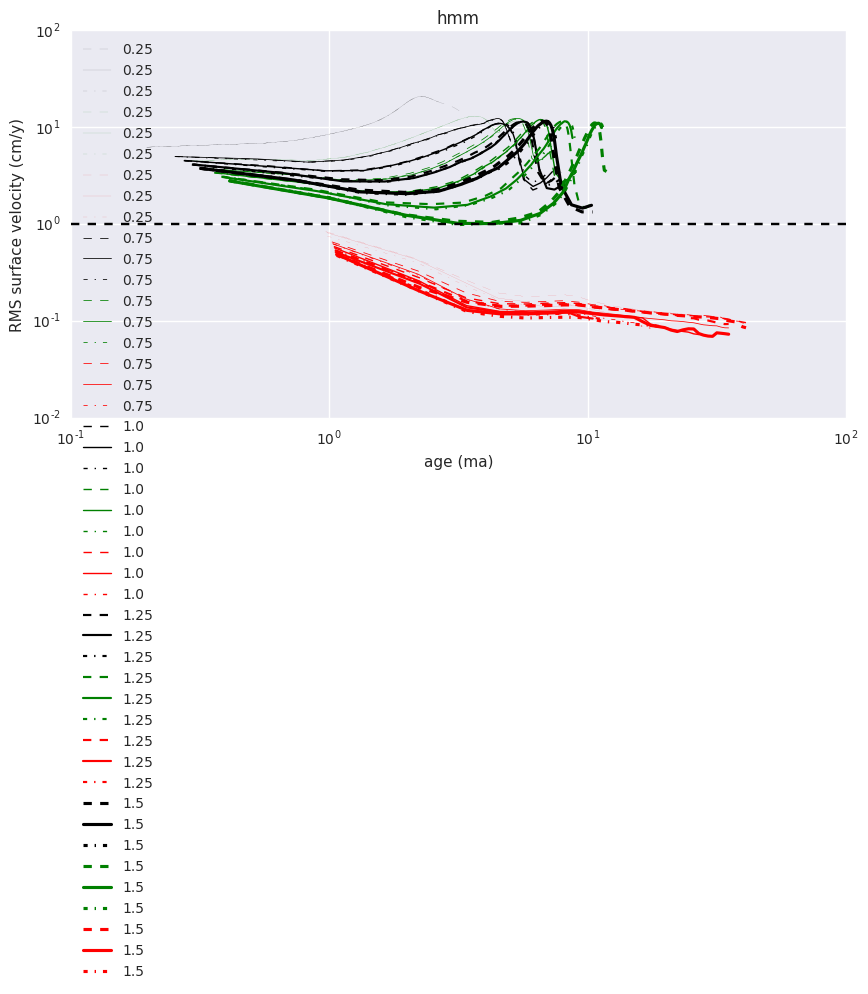

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

for i in range(0, realtime.shape[0]):
    c = c_map[params[i][1]]
    m = m_map[params[i][2]]
    ax.plot(realtime[i], data[i], c= c, label = str(params[i][0]), linewidth= params[i][0]**2, linestyle=m)

ax.set_xlim(0.1, 100.)
#ax.set_ylim(-0.7, 0.7)
ax.legend(loc=2)
ax.set_title('hmm')
ax.set_ylabel('RMS surface velocity (cm/y)')
ax.set_xlabel('age (ma)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.axhline(1., c='k', ls='--')